# Error analysis

In [1]:
import logging
import pandas as  pd
log_file=r"C:\Users\Rasulbek907\Desktop\Final_Project\Log\error_analysis.log"

In [2]:
logging.basicConfig(
    filename=log_file,
    filemode='a',
    level=logging.INFO,
    format="%(asctime)s-%(levelname)s-%(message)s"
)
logging.info('Analysis started!')

In [3]:
import os
import sys
sys.path.append(r"C:\Users\Rasulbek907\Desktop\Final_Project\Source")

In [4]:
from data_loader import DataLoader

In [5]:
path = r"C:\Users\Rasulbek907\Desktop\Final_Project\Data\Feature_selection"
loader = DataLoader(path)

In [6]:
df = loader.load_datasets()

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   float64
 1   Unnamed: 0.2        2022 non-null   float64
 2   name                2022 non-null   float64
 3   birth_date          2022 non-null   float64
 4   birth_place         2022 non-null   float64
 5   death_date          2022 non-null   float64
 6   death_place         2022 non-null   float64
 7   occupation          2022 non-null   float64
 8   awards              2022 non-null   float64
 9   alma_mater          2022 non-null   float64
 10  education           2022 non-null   float64
 11  spouse              2022 non-null   float64
 12  children            2022 non-null   float64
 13  occupation_cluster  2022 non-null   float64
 14  birth_year          2022 non-null   float64
 15  death_year          2022 non-null   float64
 16  life_s

In [8]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [10]:
num_col = df.select_dtypes(include=[np.number]).columns.drop('life_span').tolist()
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
for col in cat_col:
    df[col]=df[col].astype(str)

In [12]:
if 'life_span' not in df.columns:
    print("⚠️ Column 'life_span' not found. Available columns are:")
    print(df.columns.tolist())
else:
    
    X = df.drop('life_span', axis=1)
    y = df['life_span']

In [13]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())

])

In [14]:
num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


In [15]:
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [16]:
cat_pipeline

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [17]:
preprocessor=ColumnTransformer([
    
        ('num',num_pipeline,num_col),
        ('cat',cat_pipeline,cat_col)
    
])

In [18]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [19]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])

In [20]:
pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
print("NaN soni y_train ichida:", y_train.isna().sum())


NaN soni y_train ichida: 34


In [25]:
# NaN bo‘lgan qatorlarni olib tashlash
train_data = pd.concat([x_train, y_train], axis=1)
train_data.dropna(subset=[y_train.name], inplace=True)

In [26]:
# Yangi tozalangan versiyalar
x_train = train_data.drop(columns=[y_train.name])
y_train = train_data[y_train.name]

In [27]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.dropna(subset=[y_train.name if y_train.name else 'target'], inplace=True)

x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
pipeline.fit(x_train, y_train)


c:\Users\Rasulbek907\Desktop\Final_Project\myvenv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['Importance']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
print("NaN soni y_test ichida:", y_test.isna().sum())


NaN soni y_test ichida: 12


In [33]:
print(f"Tozalangandan keyin test_data hajmi: {test_data.shape}")


Tozalangandan keyin test_data hajmi: (0, 25)


In [34]:
# Faqat y_test dagi NaN bo‘lganlarni chiqarib tashlaymiz
mask = y_test.notna()

x_test_clean = x_test[mask]
y_test_clean = y_test[mask]

print("Tozalangandan keyin test_data hajmi:", x_test_clean.shape)


Tozalangandan keyin test_data hajmi: (402, 24)


In [35]:
# Modeldan bashorat qilish
y_pred = pipeline.predict(x_test_clean)

# Baholash
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_clean, y_pred)
mae = mean_absolute_error(y_test_clean, y_pred)

print("✅ R2 score:", r2)
print("✅ MAE:", mae)


✅ R2 score: 0.8641673718567147
✅ MAE: 4.56105922430479


c:\Users\Rasulbek907\Desktop\Final_Project\myvenv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['Importance']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [36]:

print(f"r2 is {r2:.2f}")
print(f"mae is  {mae:.2f}")

r2 is 0.86
mae is  4.56


# Error analysis

In [38]:
import numpy as np

# errors va abs_errors ni hisoblaymiz
errors = y_test_clean - y_pred
abs_errors = np.abs(errors)

# Natijalarni jadval ko‘rinishida ko‘rsatish uchun pandas DataFrame yasaymiz
import pandas as pd

errors_df = pd.DataFrame({
    'Actual': y_test_clean,
    'Predicted': y_pred,
    'Error': errors,
    'Absolute Error': abs_errors
})

print(errors_df.head())


      Actual  Predicted     Error  Absolute Error
1956    73.0  73.310000 -0.310000        0.310000
69      56.0  56.130000 -0.130000        0.130000
1568     0.0   7.908028 -7.908028        7.908028
1630    65.0  64.970036  0.029964        0.029964
777     79.0  78.470000  0.530000        0.530000


In [40]:
errors_df = errors_df.reset_index(drop=True)
x_test_reset = x_test_clean.reset_index(drop=True)

In [41]:
full_errors_df = pd.concat([x_test_reset, errors_df], axis=1)

In [42]:
print(full_errors_df.head())

   Unnamed: 0  Unnamed: 0.2      name  birth_date  birth_place  death_date  \
0      1956.0        1956.0  0.523510   -1.510744    -1.258579   -0.101202   
1        69.0          69.0 -1.071080    1.768617    -0.295065    2.049245   
2      1568.0        1568.0 -0.495982    1.763809    -0.449639   -0.694428   
3      1630.0        1630.0  0.087830   -0.313441     1.467084    0.107776   
4       777.0         777.0  1.307735    1.109860    -0.552689    1.300970   

   death_place  occupation    awards  alma_mater  ...  bio_cluster  \
0    -0.690047   -0.513085  0.391234   -0.279288  ...     2.038390   
1     1.583762    2.793759  0.391234   -0.279288  ...     2.038390   
2    -0.319653    1.853578  0.391234   -0.279288  ...     1.069735   
3     1.007593   -0.513085  0.391234   -0.279288  ...    -0.867573   
4    -0.916399    2.583029  0.391234   -0.330284  ...     1.069735   

             source_file  Feature  Importance  Top15%  Selected Features  \
0  Filtered_Features.csv      nan 

In [45]:
print(full_errors_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.2', 'name', 'birth_date', 'birth_place',
       'death_date', 'death_place', 'occupation', 'awards', 'alma_mater',
       'education', 'spouse', 'children', 'occupation_cluster', 'birth_year',
       'death_year', 'life_span_cluster', 'edu_award_cluster', 'bio_cluster',
       'source_file', 'Feature', 'Importance', 'Top15%', 'Selected Features',
       'Actual', 'Predicted', 'Error', 'Absolute Error'],
      dtype='object')


In [46]:
error_cols = full_errors_df[['name', 'Error', 'Absolute Error']]
print(error_cols.head(10))

       name         Error  Absolute Error
0  0.523510 -3.100000e-01    3.100000e-01
1 -1.071080 -1.300000e-01    1.300000e-01
2 -0.495982 -7.908028e+00    7.908028e+00
3  0.087830  2.996448e-02    2.996448e-02
4  1.307735  5.300000e-01    5.300000e-01
5  1.316449 -2.000000e-02    2.000000e-02
6 -0.975230 -3.300000e-01    3.300000e-01
7  1.102965 -7.105427e-14    7.105427e-14
8 -1.354272  2.000000e-01    2.000000e-01
9  0.641144 -5.684342e-14    5.684342e-14


# Worst Predictions

In [49]:
# 4️⃣ Sort by largest absolute errors
worst_predictions = full_errors_df.sort_values(by='Absolute Error', ascending=False).head(10)

print("🔎 Top 10 Worst Predictions:")
display(worst_predictions[['Actual', 'Predicted', 'Error', 'Absolute Error']])


🔎 Top 10 Worst Predictions:


,Actual,Predicted,Error,Absolute Error
372,914.00000,595.836128,318.163872,318.163872
294,914.00000,595.836128,318.163872,318.163872
52,918.00000,641.166163,276.833837,276.833837
233,60.20071,191.910391,-131.709680,131.709680
322,79.00000,190.280000,-111.280000,111.280000
145,0.00000,61.092007,-61.092007,61.092007
394,391.00000,333.940000,57.060000,57.060000
264,68.00000,102.052007,-34.052007,34.052007
323,0.00000,29.568099,-29.568099,29.568099
144,42.00000,65.380000,-23.380000,23.380000


In [101]:
# Error distributions

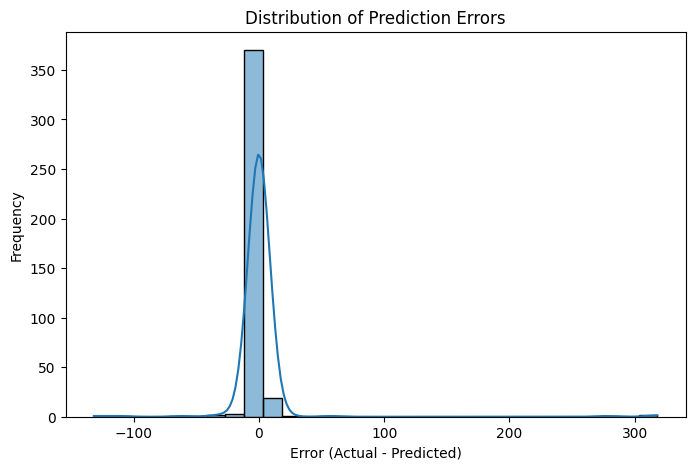

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


# Actual vs Predicted

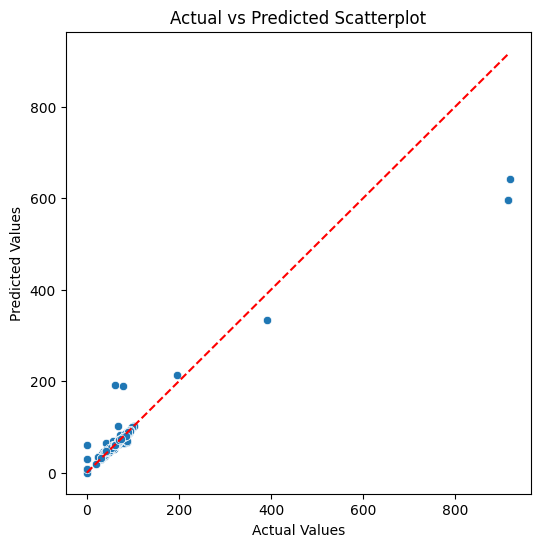

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_clean, y=y_pred)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--')  # Ideal chiziq
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatterplot")
plt.show()
